In [503]:
import numpy as np
import pandas as pd
import requests
import json
import plotly.figure_factory as ff
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
import kaleido
import plotly

## Define search engine version

In [505]:
if "SEARCH_VERSION" not in locals():
    SEARCH_VERSION = "new"
else:
    print(SEARCH_VERSION)

3.1


In [506]:
SEARCH_VERSION

3.1

## Import lastest elastic data

In [507]:
df_test = pd.read_csv("./data/elastic_wars.csv", dtype=str)

In [508]:
df_test.drop([911], axis=0, inplace=True)

In [509]:
df_test.head(3)

,terms,siren,results_elastic_2.2,pages_elastic_2.2,siren_elastic_2.2,resp_time_elastic_2.2,rank_elastic_2.2,results_elastic_3,pages_elastic_3,siren_elastic_3,resp_time_elastic_3,rank_elastic_3
0,stellantis,879786085,7.0,1.0,"['879786085', '897921219', '897940953', '91242...",0.177897,0,7.0,1.0,"['879786085', '897921219', '910055672', '89794...",0.413379,0
1,STELLANTIS,879786085,7.0,1.0,"['879786085', '897921219', '897940953', '91242...",0.088447,0,7.0,1.0,"['879786085', '897921219', '910055672', '89794...",0.201285,0
2,Stellantis,879786085,7.0,1.0,"['879786085', '897921219', '897940953', '91242...",0.174291,0,7.0,1.0,"['879786085', '897921219', '910055672', '89794...",0.040466,0


In [510]:
df_test.columns

Index(['terms', 'siren', 'results_elastic_2.2', 'pages_elastic_2.2',
       'siren_elastic_2.2', 'resp_time_elastic_2.2', 'rank_elastic_2.2',
       'results_elastic_3', 'pages_elastic_3', 'siren_elastic_3',
       'resp_time_elastic_3', 'rank_elastic_3'],
      dtype='object')

In [511]:
df_test.shape

(924, 12)

In [512]:
df_test.dtypes

terms                    object
siren                    object
results_elastic_2.2      object
pages_elastic_2.2        object
siren_elastic_2.2        object
resp_time_elastic_2.2    object
rank_elastic_2.2         object
results_elastic_3        object
pages_elastic_3          object
siren_elastic_3          object
resp_time_elastic_3      object
rank_elastic_3           object
dtype: object

## Call last search functions (maybe add description)

In [513]:
def find(key, dictionary):
    for k, v in dictionary.items():
        if k == key:
            yield v
        elif isinstance(v, dict):
            for result in find(key, v):
                yield result
        elif isinstance(v, list):
            for d in v:
                for result in find(key, d):
                    yield result

In [514]:
def get_response(url, q):
    params["q"] = q
    response = requests.get(url, params=params)
    time_elapsed = response.elapsed.total_seconds()
    content = json.loads(response.content)
    total_results = content["total_results"]
    total_pages = content["total_pages"]
    siren_list = [unite["siren"] for unite in content["results"]]
    return total_results, total_pages, siren_list, time_elapsed

In [515]:
url_elastic = "http://api.sirene.dataeng.etalab.studio/search"

In [516]:
# Get first 20 results
params = {"q": "", "page": "1", "per_page": "20"}

In [517]:
(
    df_test[f"results_elastic_{SEARCH_VERSION}"],
    df_test[f"pages_elastic_{SEARCH_VERSION}"],
    df_test[f"siren_elastic_{SEARCH_VERSION}"],
    df_test[f"resp_time_elastic_{SEARCH_VERSION}"],
) = ("", "", "", "")

In [518]:
df_test.columns

Index(['terms', 'siren', 'results_elastic_2.2', 'pages_elastic_2.2',
       'siren_elastic_2.2', 'resp_time_elastic_2.2', 'rank_elastic_2.2',
       'results_elastic_3', 'pages_elastic_3', 'siren_elastic_3',
       'resp_time_elastic_3', 'rank_elastic_3', 'results_elastic_3.1',
       'pages_elastic_3.1', 'siren_elastic_3.1', 'resp_time_elastic_3.1'],
      dtype='object')

In [519]:
df_test.head(3)

,terms,siren,results_elastic_2.2,pages_elastic_2.2,siren_elastic_2.2,resp_time_elastic_2.2,rank_elastic_2.2,results_elastic_3,pages_elastic_3,siren_elastic_3,resp_time_elastic_3,rank_elastic_3,results_elastic_3.1,pages_elastic_3.1,siren_elastic_3.1,resp_time_elastic_3.1
0,stellantis,879786085,7.0,1.0,"['879786085', '897921219', '897940953', '91242...",0.177897,0,7.0,1.0,"['879786085', '897921219', '910055672', '89794...",0.413379,0,,,,
1,STELLANTIS,879786085,7.0,1.0,"['879786085', '897921219', '897940953', '91242...",0.088447,0,7.0,1.0,"['879786085', '897921219', '910055672', '89794...",0.201285,0,,,,
2,Stellantis,879786085,7.0,1.0,"['879786085', '897921219', '897940953', '91242...",0.174291,0,7.0,1.0,"['879786085', '897921219', '910055672', '89794...",0.040466,0,,,,


In [520]:
for index, row in df_test.iterrows():
    (
        df_test[f"results_elastic_{SEARCH_VERSION}"][index],
        df_test[f"pages_elastic_{SEARCH_VERSION}"][index],
        df_test[f"siren_elastic_{SEARCH_VERSION}"][index],
        df_test[f"resp_time_elastic_{SEARCH_VERSION}"][index],
    ) = get_response(url_elastic, row["terms"])
    if index % 5 == 0: 
        time.sleep(0.5)

In [521]:
df_test

,terms,siren,results_elastic_2.2,pages_elastic_2.2,siren_elastic_2.2,resp_time_elastic_2.2,rank_elastic_2.2,results_elastic_3,pages_elastic_3,siren_elastic_3,resp_time_elastic_3,rank_elastic_3,results_elastic_3.1,pages_elastic_3.1,siren_elastic_3.1,resp_time_elastic_3.1
0,stellantis,879786085,7.0,1.0,"['879786085', '897921219', '897940953', '91242...",0.177897,0,7.0,1.0,"['879786085', '897921219', '910055672', '89794...",0.413379,0,7,1,"[879786085, 897921219, 910055672, 897940953, 5...",0.18854
1,STELLANTIS,879786085,7.0,1.0,"['879786085', '897921219', '897940953', '91242...",0.088447,0,7.0,1.0,"['879786085', '897921219', '910055672', '89794...",0.201285,0,7,1,"[879786085, 897921219, 910055672, 897940953, 5...",0.036261
2,Stellantis,879786085,7.0,1.0,"['879786085', '897921219', '897940953', '91242...",0.174291,0,7.0,1.0,"['879786085', '897921219', '910055672', '89794...",0.040466,0,7,1,"[879786085, 897921219, 910055672, 897940953, 5...",0.033536
3,air france,420495178,1664.0,84.0,"['420495178', '632041042', '775740822', '31411...",0.261469,0,1307.0,66.0,"['420495178', '378006027', '314119504', '77574...",1.403911,0,1313,66,"[420495178, 378006027, 314119504, 775740822, 3...",1.154233
4,Air france,420495178,1664.0,84.0,"['420495178', '632041042', '775740822', '31411...",0.204287,0,1307.0,66.0,"['420495178', '378006027', '314119504', '77574...",1.448253,0,1313,66,"[420495178, 378006027, 314119504, 775740822, 3...",1.085682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
920,pontecaille gregoire,818452476,2.0,1.0,"['818452476', '484266358']",0.024387,0,2.0,1.0,"['818452476', '484266358']",0.020516,0,2,1,"[818452476, 484266358]",0.017371
921,sherpa,393825229,393.0,20.0,"['801698242', '334075736', '515198844', '52477...",0.055141,-1,393.0,20.0,"['500913785', '810600601', '391898244', '50451...",0.037308,-1,410,21,"[500913785, 531666956, 810600601, 391898244, 5...",0.042414
922,sherpa,500913785,393.0,20.0,"['801698242', '334075736', '515198844', '52477...",0.043145,6,393.0,20.0,"['500913785', '810600601', '391898244', '50451...",0.030636,0,410,21,"[500913785, 531666956, 810600601, 391898244, 5...",0.053021
923,mc animation,820552925,7.0,1.0,"['820552925', '440736965', '480011089', '66202...",0.035558,0,6.0,1.0,"['440736965', '820552925', '398015974', '50865...",0.020919,1,6,1,"[440736965, 820552925, 398015974, 508659836, 4...",0.037613


In [522]:
elastic_columns = [
    col
    for col in df_test.columns
    if "elastic" in col and ("result" in col or "pages" in col or "resp_time" in col)
]

In [523]:
elastic_columns

['results_elastic_2.2',
 'pages_elastic_2.2',
 'resp_time_elastic_2.2',
 'results_elastic_3',
 'pages_elastic_3',
 'resp_time_elastic_3',
 'results_elastic_3.1',
 'pages_elastic_3.1',
 'resp_time_elastic_3.1']

In [524]:
for col in elastic_columns:
    df_test[col] = df_test[col].astype("float64")

In [525]:
df_test.dtypes

terms                     object
siren                     object
results_elastic_2.2      float64
pages_elastic_2.2        float64
siren_elastic_2.2         object
resp_time_elastic_2.2    float64
rank_elastic_2.2          object
results_elastic_3        float64
pages_elastic_3          float64
siren_elastic_3           object
resp_time_elastic_3      float64
rank_elastic_3            object
results_elastic_3.1      float64
pages_elastic_3.1        float64
siren_elastic_3.1         object
resp_time_elastic_3.1    float64
dtype: object

In [526]:
df_test.describe()

,results_elastic_2.2,pages_elastic_2.2,resp_time_elastic_2.2,results_elastic_3,pages_elastic_3,resp_time_elastic_3,results_elastic_3.1,pages_elastic_3.1,resp_time_elastic_3.1
count,924.000000,924.000000,924.000000,924.000000,924.000000,924.000000,924.000000,924.000000,924.000000
mean,374.783550,19.320346,0.062398,351.987013,18.207792,0.195892,352.784632,18.247835,0.250634
std,1530.742341,76.451836,0.050272,1512.006268,75.503324,0.472130,1512.725549,75.541184,0.617462
min,0.000000,0.000000,0.005228,0.000000,0.000000,0.005421,0.000000,0.000000,0.006045
25%,2.750000,1.000000,0.023770,2.000000,1.000000,0.019167,2.000000,1.000000,0.024592
50%,12.000000,1.000000,0.051334,9.000000,1.000000,0.039228,9.000000,1.000000,0.049844
75%,65.000000,4.000000,0.085347,46.000000,3.000000,0.110231,46.000000,3.000000,0.146496
max,10000.000000,500.000000,0.435656,10000.000000,500.000000,4.835054,10000.000000,500.000000,7.029347


In [527]:
df_test.describe().to_csv(
    f"./output/describe/describe_{SEARCH_VERSION}.csv", header=True, index=True
)

## Ranks

In [528]:
df_test[f"rank_elastic_{SEARCH_VERSION}"] = ""

In [529]:
for ind, row in df_test.iterrows():
    if str(row["siren"]) in row[f"siren_elastic_{SEARCH_VERSION}"]:
        df_test[f"rank_elastic_{SEARCH_VERSION}"][ind] = row[
            f"siren_elastic_{SEARCH_VERSION}"
        ].index(str(row["siren"]))
    else:
        df_test[f"rank_elastic_{SEARCH_VERSION}"][ind] = -1

In [530]:
df_test[f"rank_elastic_{SEARCH_VERSION}"] = df_test[
    f"rank_elastic_{SEARCH_VERSION}"
].astype("int32")

## KPIs

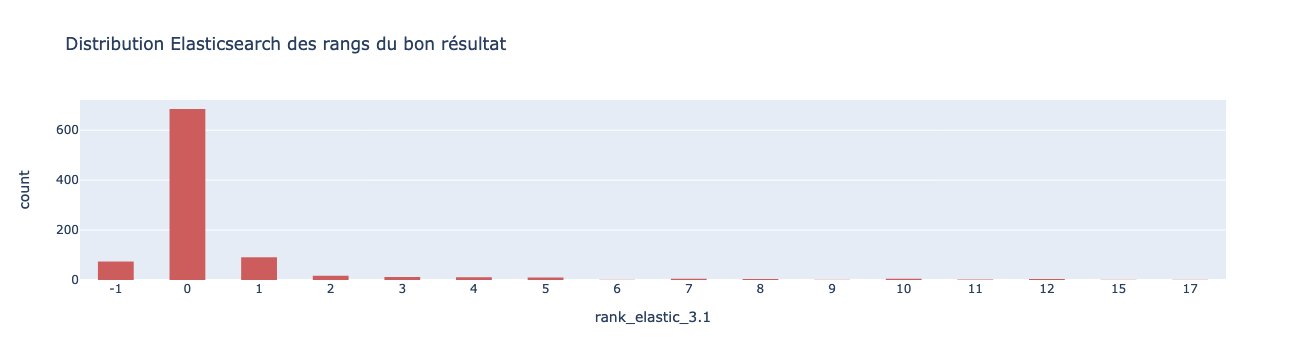

'./output/plots/rank_3.1.html'

In [531]:
fig = px.histogram(
    df_test.sort_values(by=[f"rank_elastic_{SEARCH_VERSION}"]),
    x=f"rank_elastic_{SEARCH_VERSION}",
    color_discrete_sequence=["indianred"],
    title="Distribution Elasticsearch des rangs du bon résultat",
)
fig.update_layout(bargap=0.5)
fig.update_xaxes(type="category")
fig.show()
plotly.offline.plot(fig, filename=f"./output/plots/rank_{SEARCH_VERSION}.html")

In [532]:
rank_columns = [col for col in df_test.columns if "rank_elastic" in col]

In [533]:
rank_columns

['rank_elastic_2.2', 'rank_elastic_3', 'rank_elastic_3.1']

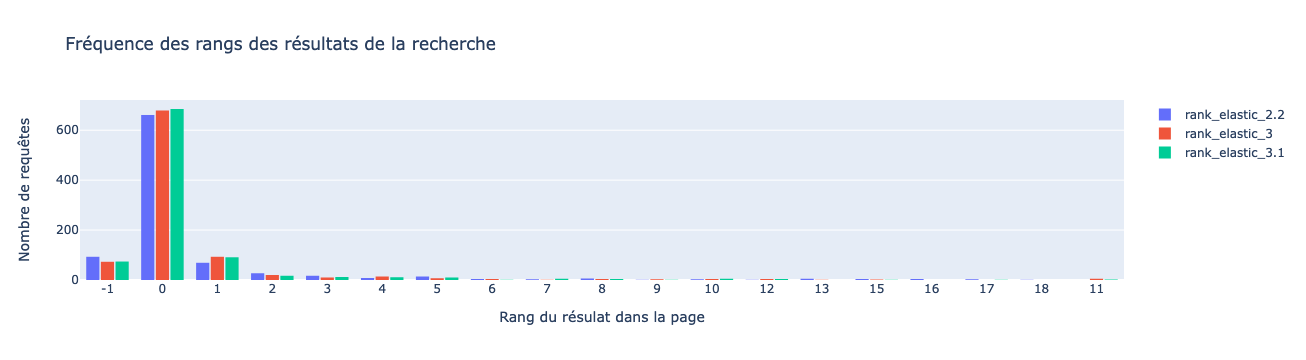

'./output/plots/rank_war_3.1.html'

In [534]:
fig = go.Figure()
rank_dict = {}
for rank in rank_columns:
    df_test[rank] = df_test[rank].astype("int32")
    rank_dict[rank] = df_test.sort_values(by=[rank])[rank]
    fig.add_trace(
        go.Histogram(
            histfunc="count",
            x=rank_dict[rank],
            name=rank,
        )
    )
fig.update_layout(
    title_text="Fréquence des rangs des résultats de la recherche",  # title of plot
    xaxis_title_text="Rang du résulat dans la page",  # xaxis label
    yaxis_title_text="Nombre de requêtes",  # yaxis label
    bargap=0.2,  # gap between bars of adjacent location coordinates
    bargroupgap=0.1,  # gap between bars of the same location coordinates
)
fig.update_xaxes(type="category")
fig.show()
# fig.write_image(f"./output/plots/rank_{SEARCH_VERSION}.png")
plotly.offline.plot(fig, filename=f"./output/plots/rank_war_{SEARCH_VERSION}.html")

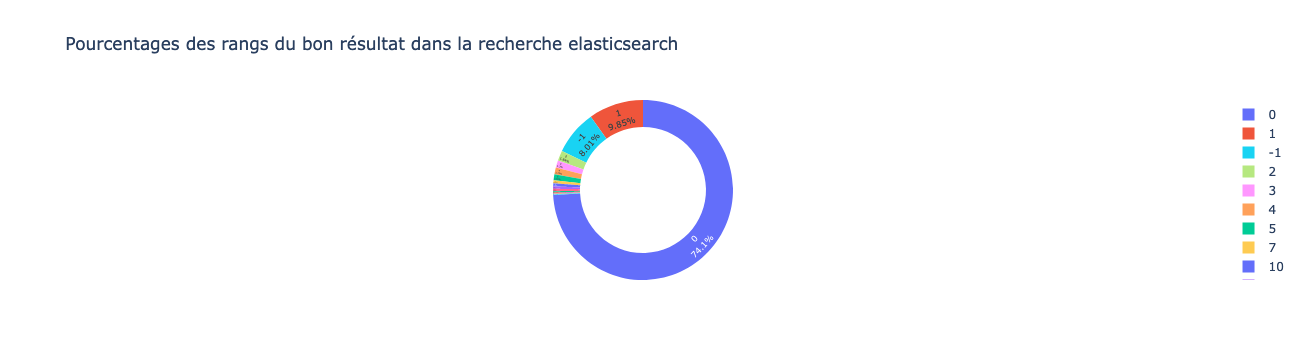

'./output/plots/pie_3.1.html'

In [535]:
fig = px.pie(
    df_test,
    names=rank_columns[-1],
    hole=0.7,
    color=rank_columns[-1],
    title="Pourcentages des rangs du bon résultat dans la recherche elasticsearch",
)
fig.update_traces(textposition="inside", textinfo="percent+label")
fig.show()
plotly.offline.plot(fig, filename=f"./output/plots/pie_{SEARCH_VERSION}.html")

### Nombre maximale de requête


In [536]:
df_max = (
    df_test[f"results_elastic_{SEARCH_VERSION}"].value_counts(normalize=True) * 100
).reset_index()
df_max[df_max["index"] == "10000.0"].to_csv(
    f"./output/describe/max_requetes_{SEARCH_VERSION}.csv", header=True, index=True
)
df_max[df_max["index"] == "10000.0"]

,index,results_elastic_3.1


### Sauvegarder les dataframes

In [537]:
df_test.to_csv(f"./data/elastic_wars_{SEARCH_VERSION}.csv", header=True, index=False)

In [538]:
elastic_columns = [col for col in df_test.columns if "elastic" in col]
columns_to_save = ["terms", "siren"]
columns_to_save = columns_to_save + elastic_columns[-10:]
columns_to_save

['terms',
 'siren',
 'results_elastic_3',
 'pages_elastic_3',
 'siren_elastic_3',
 'resp_time_elastic_3',
 'rank_elastic_3',
 'results_elastic_3.1',
 'pages_elastic_3.1',
 'siren_elastic_3.1',
 'resp_time_elastic_3.1',
 'rank_elastic_3.1']

In [540]:
df_test.to_csv(
    f"./data/elastic_wars.csv", header=True, index=False, columns=columns_to_save
)